# Single stock analysis example in pyfolio

Here's a simple example where we produce a set of plots, called a tear sheet, for a stock.

## Import pyfolio

In [1]:
%matplotlib inline
import pyfolio as pf

## Fetch the daily returns for a stock

In [2]:
stock_rets = pf.utils.get_symbol_rets('FB')

## Create a full tear sheet for the single stock
This will show charts about returns and shock events. As an example, we set the first 80% of the stock's history to be in-sample, which controls the cone plot. The Bayesian tear sheet is also enabled.

Entire data start date: 2012-05-21 00:00:00
Entire data end date: 2015-07-14 00:00:00


Out-of-Sample Months: 7
Backtest Months: 30
                   Backtest  Out_of_Sample  All_History
sortino_ratio          1.54           2.95         1.59
omega_ratio            1.16           1.27         1.17
max_drawdown          -0.48          -0.09        -0.48
calmar_ratio           0.79           3.60         0.77
annual_return          0.38           0.33         0.37
stability              0.84           0.55         0.87
sharpe_ratio           0.78           1.48         0.83
annual_volatility      0.49           0.22         0.45
alpha                  0.17           0.27         0.19
beta                   0.97           1.04         0.98

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0              47.90 2012-05-21  2012-09-04    2013-07-25      309
1              22.06 2014-03-10  2014-04-28    2014-07-24       99
2              17.34 2013-1

/Users/jlent/anaconda/envs/quant/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


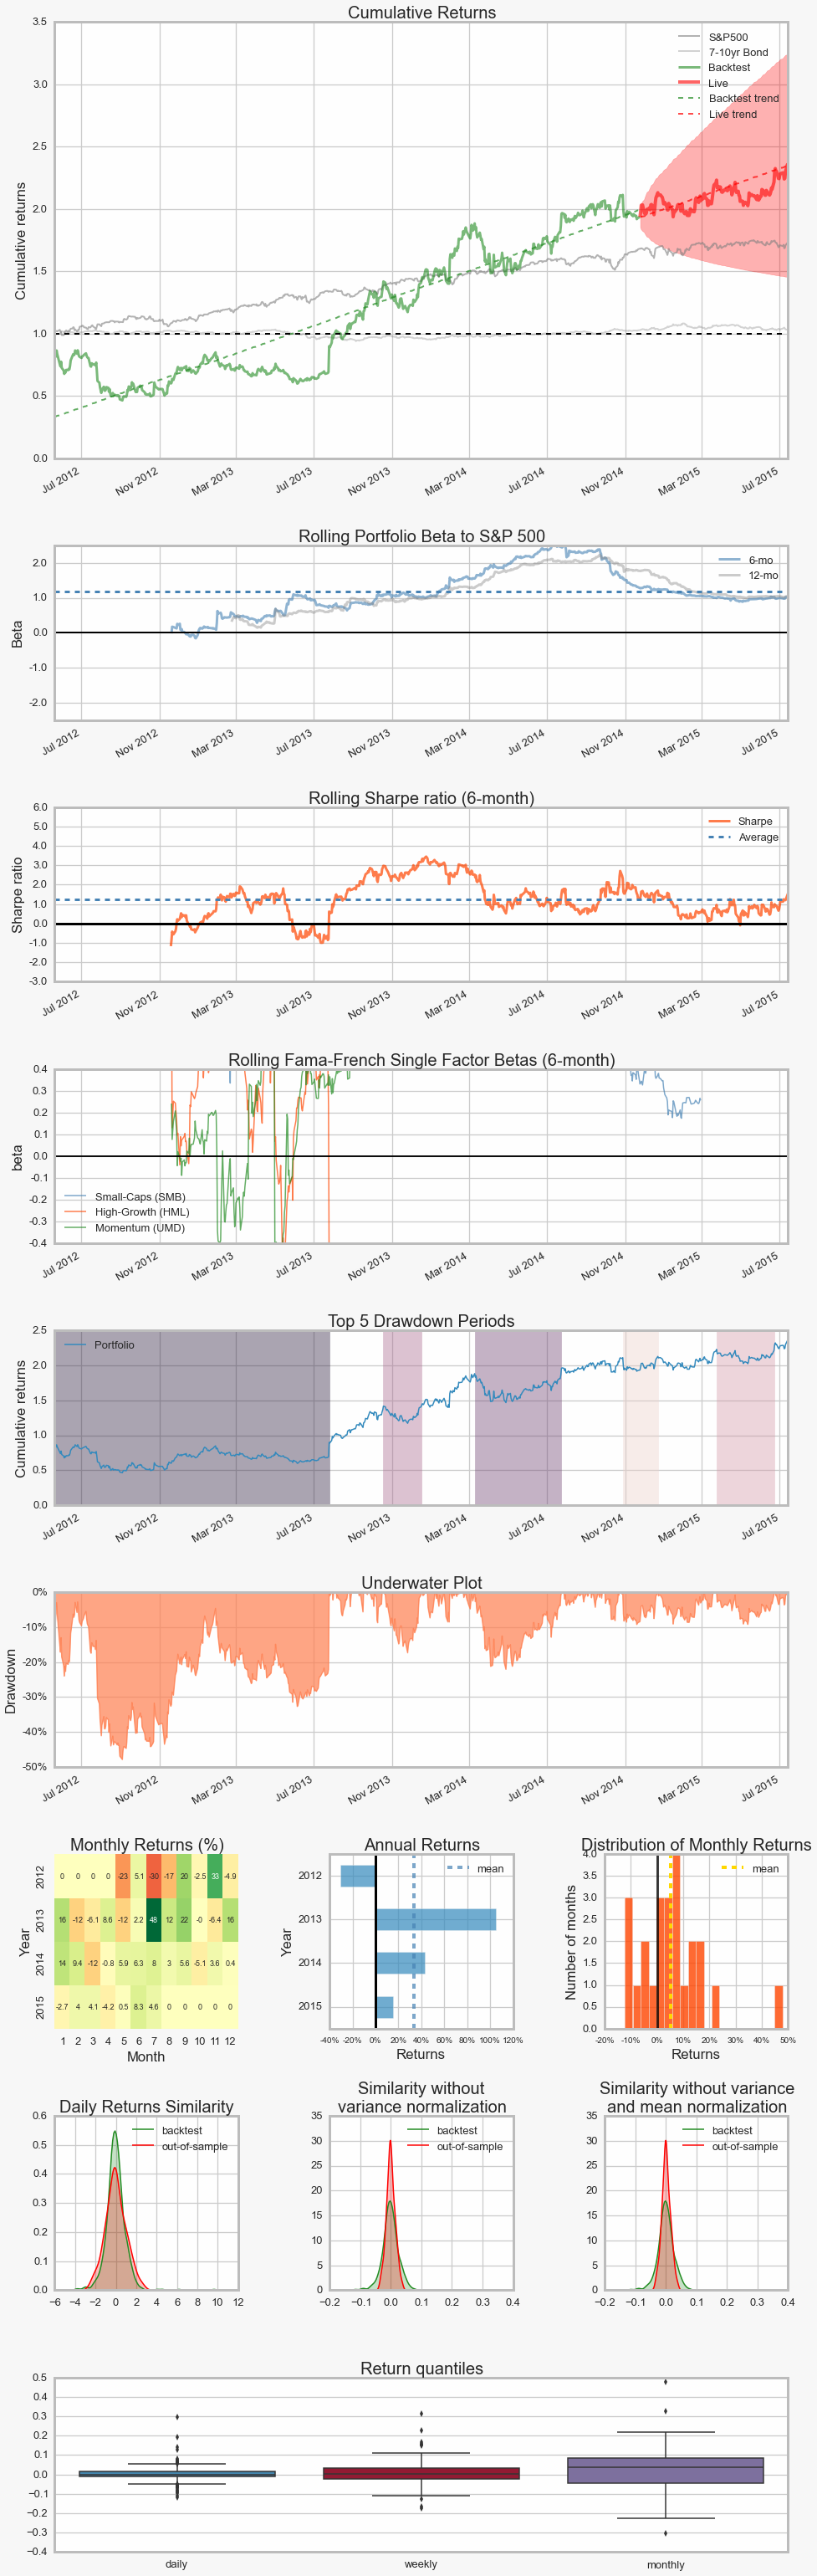

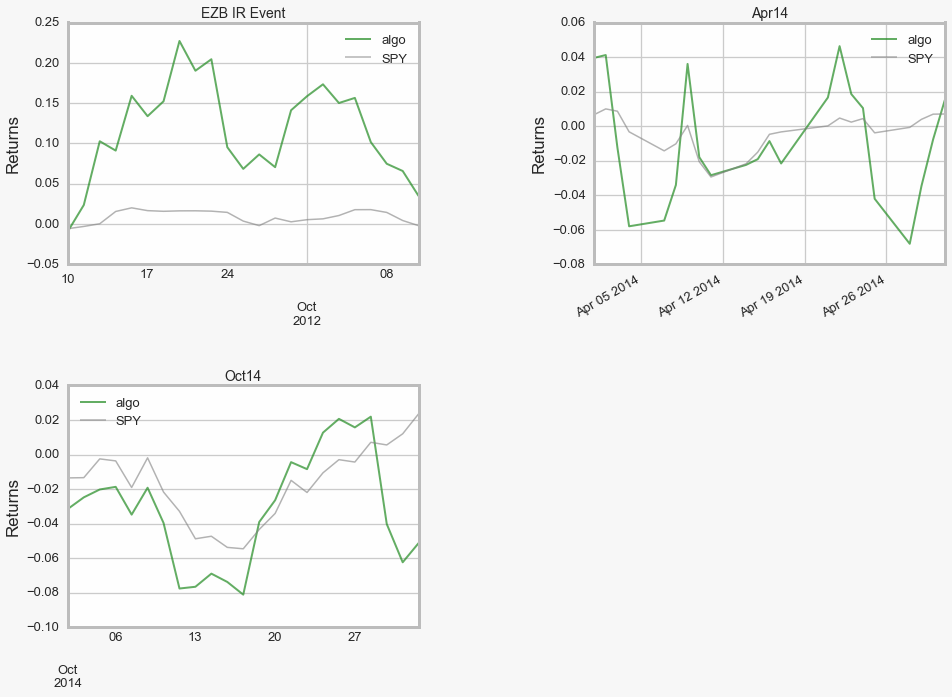

In [3]:
pf.create_full_tear_sheet(stock_rets, backtest_days_pct=0.8, bayesian=False)

## Create a full tear sheet for an equal-weight portfolio of:
* Long SPY
* Short QQQ
* Long GLD
* Long TLT

In [4]:
stock_rets_SPY = pf.utils.get_symbol_rets('SPY')
stock_rets_QQQ = pf.utils.get_symbol_rets('QQQ')
stock_rets_GLD = pf.utils.get_symbol_rets('GLD')
stock_rets_TLT = pf.utils.get_symbol_rets('TLT')

In [12]:
portfolio_4_assets_rets = pf.timeseries.portfolio_returns([stock_rets_SPY, -1 * stock_rets_QQQ, stock_rets_GLD, stock_rets_TLT], 
                                exclude_non_overlapping=True)

Entire data start date: 2004-11-19 00:00:00
Entire data end date: 2015-07-14 00:00:00


Out-of-Sample Months: 25
Backtest Months: 102
                   Backtest  Out_of_Sample  All_History
sortino_ratio          1.11          -0.63         0.80
omega_ratio            1.14           0.93         1.10
max_drawdown          -0.09          -0.08        -0.13
calmar_ratio           0.58          -0.35         0.28
annual_return          0.05          -0.03         0.04
stability              0.97           0.01         0.84
sharpe_ratio           0.75          -0.43         0.54
annual_volatility      0.07           0.06         0.07
alpha                  0.06          -0.01         0.04
beta                  -0.05          -0.11        -0.05

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0              13.06 2012-11-13  2013-12-19           NaT      NaN
2               8.96 2008-03-17  2008-08-15    2008-12-10      193
1               8.85 2008

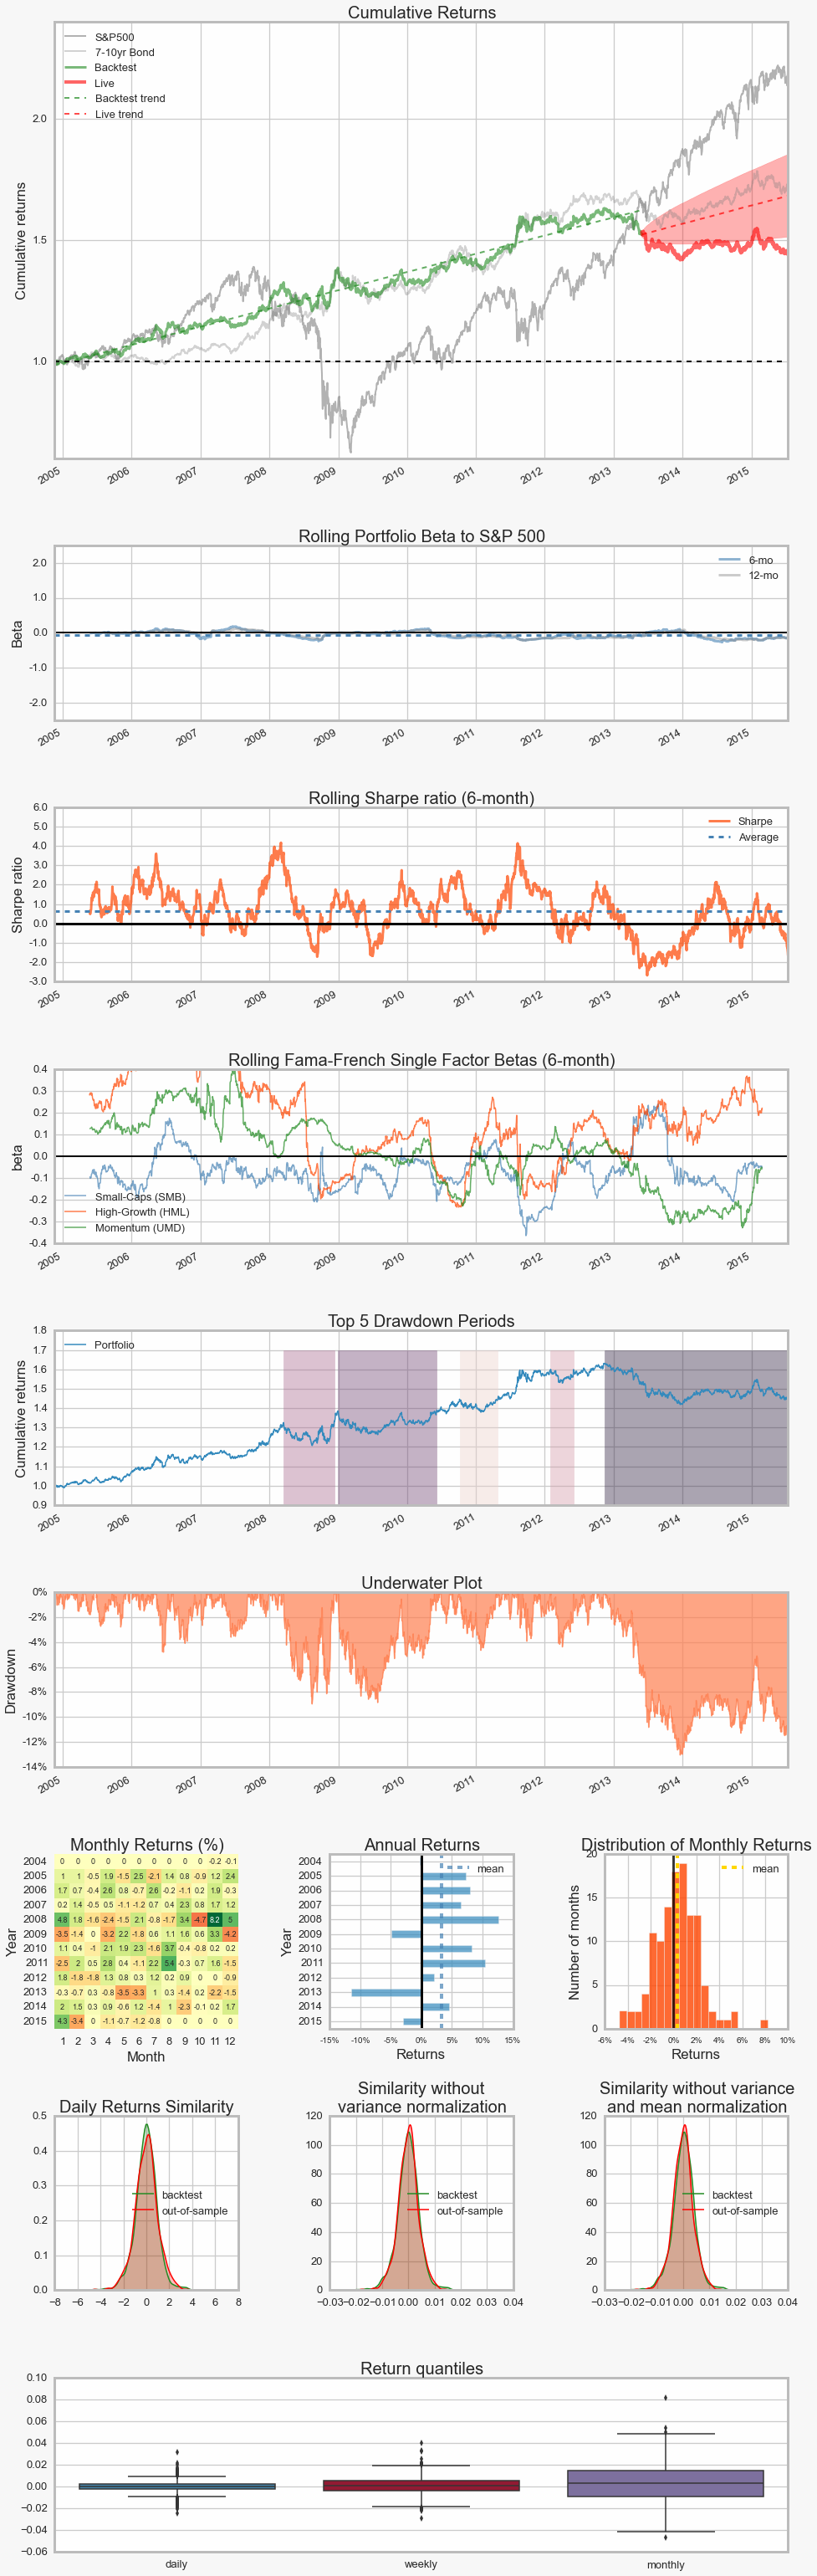

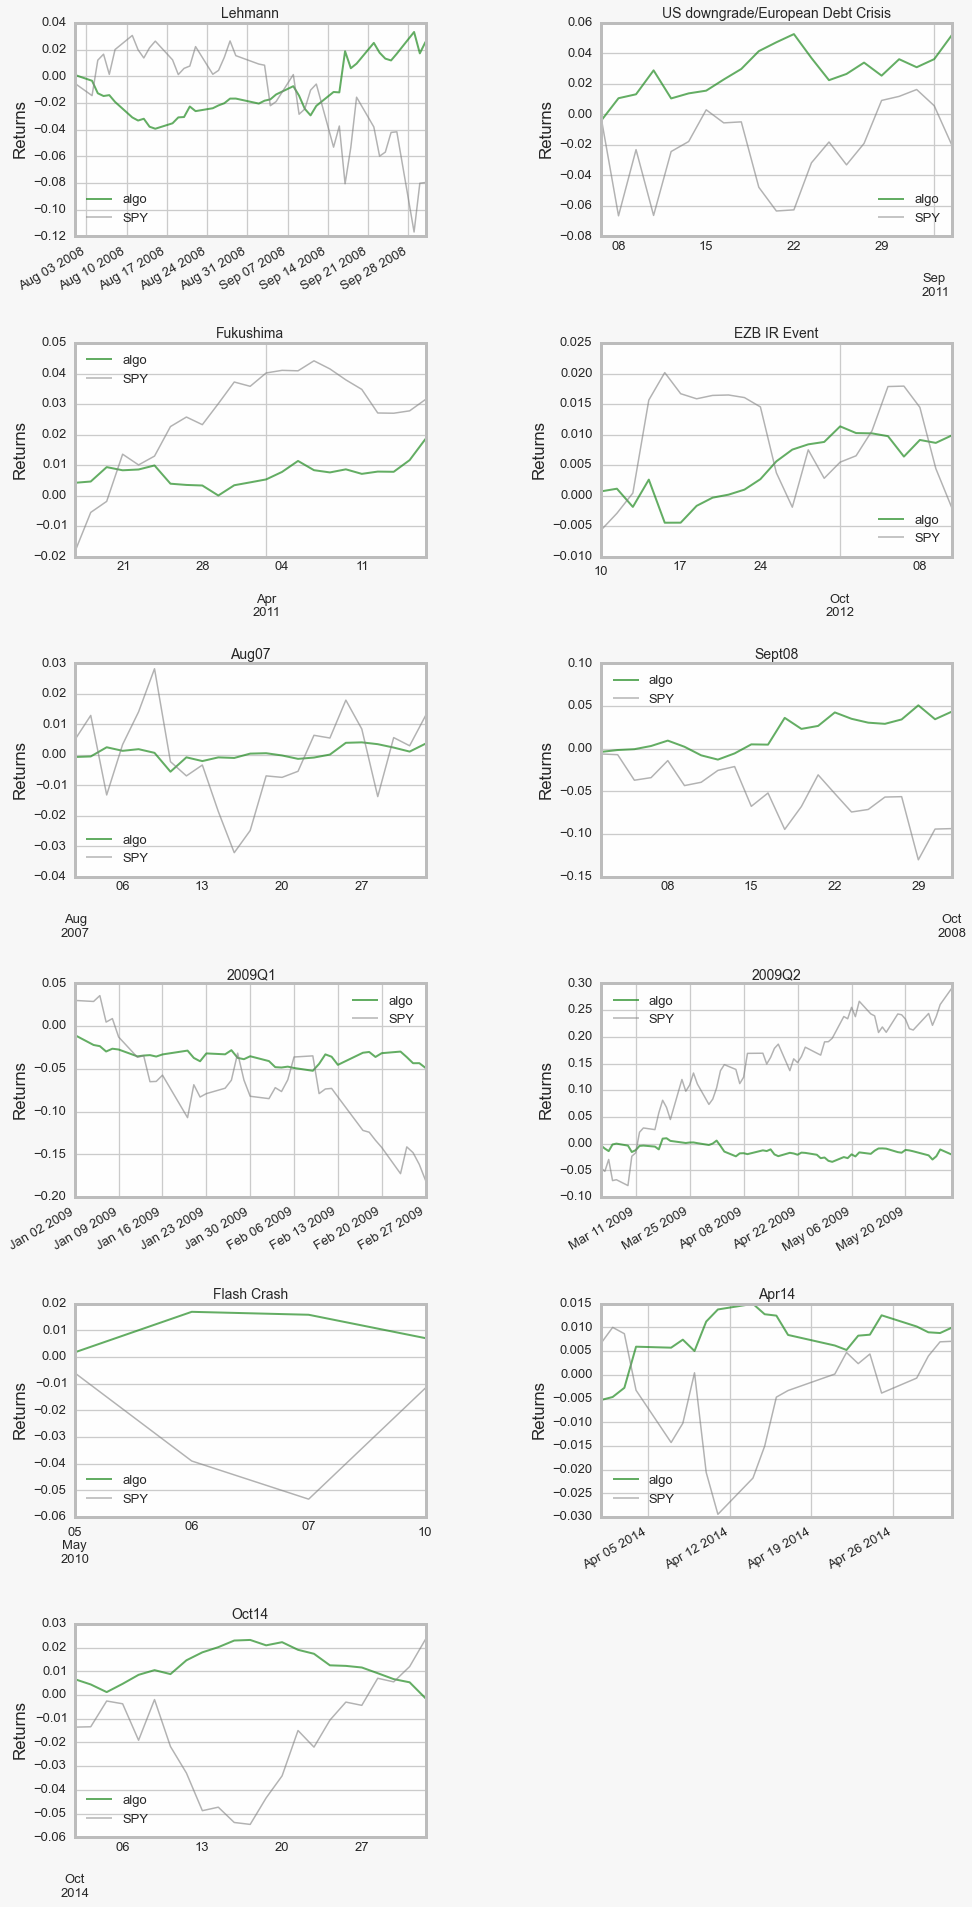

In [13]:
pf.create_full_tear_sheet(portfolio_4_assets_rets, backtest_days_pct=0.8, bayesian=False)